<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/hw09_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw09.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 09: Estimation

## References

* [Estimation](https://ccsf-math-108.github.io/textbook/chapters/13/Estimation.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Thai Restaurants


---

Oswaldo and Varun are trying to see what the best Thai restaurant in Berkeley is. They survey 1,500 UC Berkeley students selected uniformly at random and ask each student what Thai restaurant is the best. (*Note: This data is fabricated for the purposes of this homework.*) The choices of Thai restaurants are [Lucky House](https://www.google.com/maps/place/Lucky+House+Thai+Cuisine/@37.8707428,-122.270045,15.32z/data=!4m5!3m4!1s0x80857e9e69a8c921:0x7b6d80f58406fb26!8m2!3d37.8721393!4d-122.2672699), [Imm Thai](https://www.google.com/maps/place/Imm+Thai+Street+Food/@37.8704926,-122.2687372,15.51z/data=!4m5!3m4!1s0x80857e9eec4f1e63:0x5f54d96f0dccdb72!8m2!3d37.8719079!4d-122.2691186), [Thai Temple](https://www.google.com/maps/place/Wat+Mongkolratanaram/@37.8689514,-122.2698649,14.75z/data=!4m5!3m4!1s0x80857e886e39daf1:0xe309caa1b5710fc0!8m2!3d37.8563633!4d-122.2707584), and [Thai Basil](https://www.google.com/maps/place/Thai+Basil/@37.8691911,-122.266539,15.37z/data=!4m5!3m4!1s0x80857c2f6ae0e2f1:0x6978b6e8a72d58d4!8m2!3d37.868327!4d-122.258081). After compiling the results, Oswaldo and Varun release the following percentages, percentages of votes that each restaurant received, from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 52% |
|Thai Temple | 25% |
|Thai Basil | 15% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population (the entire population is all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [ ]:
# Just run this cell
votes = Table.read_table('votes.csv').sample(with_replacement = False)
votes

Vote
Imm Thai
Thai Basil
Thai Temple
Imm Thai
Thai Temple
Imm Thai
Imm Thai
Lucky House
Imm Thai
Thai Basil


---

### Task 01 📍

Complete the function `one_resampled_percentage` below. It should return Imm Thai's **percentage** of votes after simulating one bootstrap sample of `tbl`.

* You can assume that `tbl` contains the original sample data. Your function should create a resample from this data.
* `tbl` will always be in the same format as `votes`.
* This function should be completed **without** `.group` or `.pivot`. Using these functions will cause your code to timeout.
* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

_Points:_ 3

In [ ]:
def one_resampled_percentage(tbl):
    resample=tbl.sample()
    return (resample.where(resample.column(0),are.containing('Imm Thai')).num_rows/resample.num_rows)*100

one_resampled_percentage(votes)

50.66666666666667

In [ ]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ Your function returns a float.
task_01 - 2 message: ✅ Your function returns a value within a range of possible answers.

---

### Task 02 📍

Complete the `percentages_in_resamples` function such that it simulates and returns an array of **2023 elements**, where each element represents a bootstrapped estimate of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above.

* We perform our simulation with **only 2023 trials** in this problem to reduce the runtime, but we should generally use more repetitions.

_Points:_ 3

In [ ]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2023):
        est=one_resampled_percentage(votes)
        percentage_imm=np.append(percentage_imm,est)
    return percentage_imm

In [ ]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ percentages_in_resamples is defined to be a function.
task_02 - 2 message: ✅ percentages_in_resamples produces an array with 2023 items.

---

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2023 bootstrap estimates of the percentage of voters who voted for Imm Thai.

*Note:* This might take a few seconds to run.

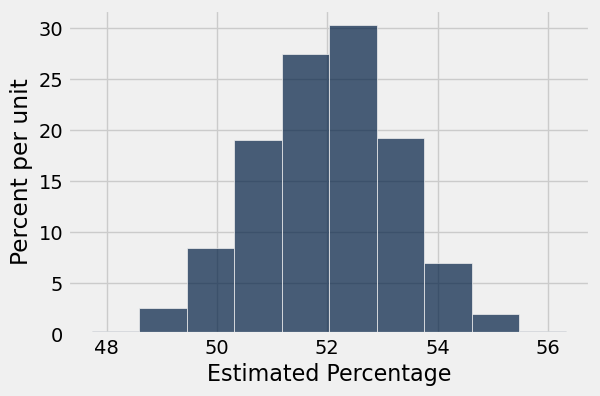

In [ ]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

---

### Task 03 📍

Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound`, respectively.)


_Points:_ 2

In [ ]:
imm_lower_bound = percentile(2.5,resampled_percentages)
imm_upper_bound = percentile(97.5,resampled_percentages)
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population:[{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population:[49.47, 54.53]


In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your values for imm_lower_bound and imm_upper_bound are within an appropriate interval.

---

### Task 04 📍

The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants among the voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's percent of the vote} - (\text{100 percent} - \text{Imm Thai's percent of the vote})$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`.

* Imm Thai's lead can be negative.
* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**
* If the skeleton code provided within the function is not helpful for you, feel free to approach the question using your own variables.


_Points:_ 2

In [ ]:
def one_resampled_difference(tbl):
    imm_percentage = one_resampled_percentage(tbl)
    return imm_percentage-(100-imm_percentage)

In [ ]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ Your function returns a float.

---

### Task 05 📍🔎

<!-- BEGIN QUESTION -->

Write a function called `leads_in_resamples` that returns an array of 2023 elements representing the bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Afterwards, run the cell to plot a histogram of the resulting samples.

* If you see an error involving `NoneType`, consider what components a function needs to have!

_Points:_ 2

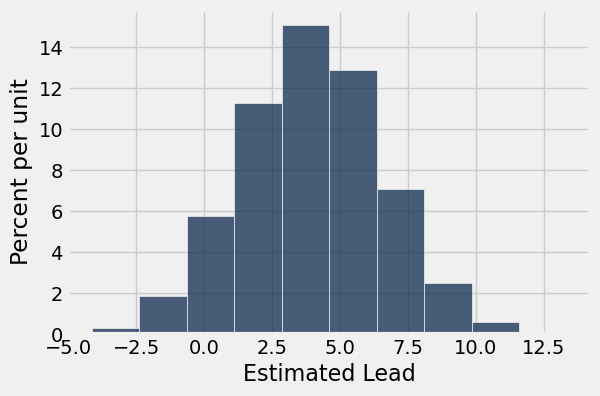

In [ ]:
def leads_in_resamples():
    sampled_leads=make_array()
    for i in np.arange(2023):
        imm_lead=one_resampled_difference(votes)
        sampled_leads=np.append(sampled_leads,imm_lead)
    return sampled_leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

---

### Task 06 📍

Use the simulated data in `sampled_leads` from Task 05 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined.


_Points:_ 3

In [ ]:
diff_lower_bound = percentile(2.5,sampled_leads)
diff_upper_bound = percentile(97.5,sampled_leads)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [-1.066667, 8.933333]


In [ ]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ The values of diff_lower_bound and diff_upper_bound are within a reasonable interval.

---

## Interpreting Confidence Intervals

---

We computed the following 95% confidence interval for the percentage of Imm Thai voters:

$$[49.40, 54.47]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

---

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Imm Thai as the best Berkeley Thai restaurant? Answer "yes" or "no" and explain your reasoning.

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.


_Points:_ 2

Yes. The distrubition is bell shaped and sample size is large.

<!-- END QUESTION -->

---

### Task 08 📍🔎

<!-- BEGIN QUESTION -->

We also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]


_Points:_ 2

In [ ]:
percentile(15,resampled_percentages)

50.666666666666671

In [ ]:
percentile(85,resampled_percentages)

53.333333333333336

In [ ]:
percentile(5,resampled_percentages)

49.799999999999997

In [ ]:
percentile(95,resampled_percentages)

54.066666666666663

In [ ]:
percentile(0.5,resampled_percentages)

48.733333333333334

In [ ]:
percentile(99.5,resampled_percentages)

55.200000000000003

90%=[49.87, 54.00]
70%=[50.67, 53.27]
99%=[48.80, 55.40]

I checked the percentile values for each % then choose the ones matching

<!-- END QUESTION -->

---

### Task 09 📍

Suppose we produced 5,000 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 95% confidence interval from each one. Roughly how many of those 5,000 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.


_Points:_ 2

In [ ]:
true_percentage_intervals = 5000*.95
true_percentage_intervals

4750.0

In [ ]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ The value of true_percentage_intervals is within a possible interval.

---

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 4%.

Our 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

(Yours should have looked similar.)

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai tied with the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the 95% confidence interval we created and shared with you.

---

### Task 10 📍

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using the provided confidence interval

_Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://ccsf-math-108.github.io/textbook/chapters/13/4/Using_Confidence_Intervals.html) of the textbook._


_Points:_ 2

In [ ]:
restaurants_tied = 2

In [ ]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ restaurants_tied represents a possible answer.

---

### Task 11 📍

What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using the provided confidence interval


_Points:_ 2

In [ ]:
cutoff_one_percent = 2

In [ ]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ cutoff_one_percent represents a possible answer.

---

### Task 12 📍

What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval


_Points:_ 2

In [ ]:
cutoff_ten_percent = 1

In [ ]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ cutoff_ten_percent represents a possible answer.

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ Your function returns a float.
task_01 - 2 message: ✅ Your function returns a value within a range of possible answers.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ percentages_in_resamples is defined to be a function.
task_02 - 2 message: ✅ percentages_in_resamples produces an array with 2023 items.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your values for imm_lower_bound and imm_upper_bound are within an appropriate interval.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ Your function returns a float.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ The values of diff_lower_bound and diff_upper_bound are within a reasonable interval.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ The value of true_percentage_intervals is within a possible interval.

task_10 results: All test cases passed!
task_10 - 1 message: ✅ restaurants_tied repr